In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

data_file = "Hanoi.csv"
df = pd.read_csv(data_file)
hanoi = df.iloc[0:79,]
hanoi.head()

,ds,y
0,2018-05-12-08,945200
1,2018-05-13-08,890097
2,2018-05-14-08,981463
3,2018-05-15-08,984224
4,2018-05-16-08,989619


In [2]:
len(hanoi)

79

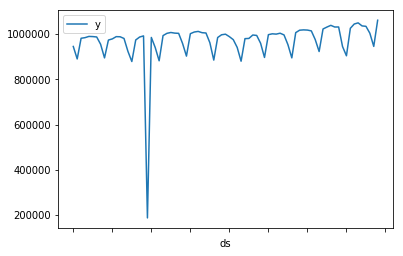

In [4]:
hanoi.set_index('ds').plot();

In [5]:
hanoi['ds'] = pd.to_datetime(hanoi['ds'])

C:\Users\Thend\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
hanoi.columns = ["ds", "y"]
hanoi.head()

,ds,y
0,2018-05-12 08:00:00,945200
1,2018-05-13 08:00:00,890097
2,2018-05-14 08:00:00,981463
3,2018-05-15 08:00:00,984224
4,2018-05-16 08:00:00,989619


In [8]:
m1 = Prophet()
m1.fit(hanoi)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Thend\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future1 = m1.make_future_dataframe(periods=10)
forecast1 = m1.predict(future1)

In [10]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(n=10)

,ds,yhat,yhat_lower,yhat_upper
79,2018-07-31 08:00:00,1.056208e+06,951022.521812,1.174521e+06
80,2018-08-01 08:00:00,1.056932e+06,951686.281556,1.172537e+06
81,2018-08-02 08:00:00,9.815420e+05,873312.021995,1.096156e+06
82,2018-08-03 08:00:00,1.050546e+06,939780.626205,1.163941e+06
83,2018-08-04 08:00:00,1.009381e+06,895602.112215,1.114039e+06
84,2018-08-05 08:00:00,9.522993e+05,845981.804071,1.056727e+06
85,2018-08-06 08:00:00,1.054075e+06,939000.606828,1.166168e+06
86,2018-08-07 08:00:00,1.064451e+06,953464.897799,1.173346e+06
87,2018-08-08 08:00:00,1.065174e+06,950214.869937,1.172190e+06
88,2018-08-09 08:00:00,9.897844e+05,881340.274567,1.098295e+06


In [11]:
df.iloc[80:89,]

,ds,y
80,2018-08-01-08,1068123
81,2018-08-02-08,1069335
82,2018-08-03-08,1075767
83,2018-08-04-08,1034508
84,2018-08-05-08,952116
85,2018-08-06-08,1087495
86,2018-08-07-08,1104229
87,2018-08-08-08,1099111
88,2018-08-09-08,1111715


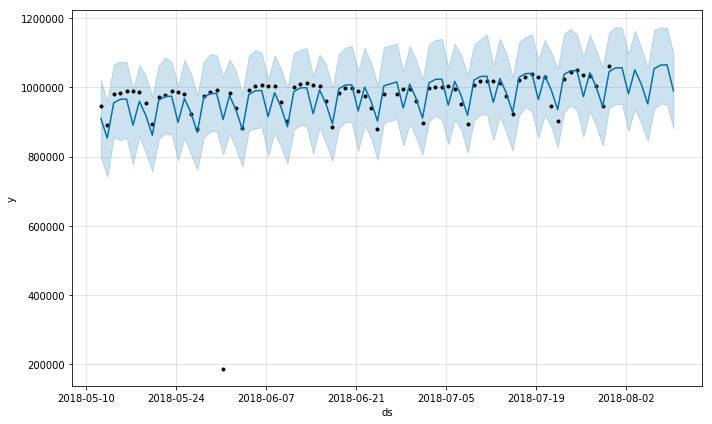

In [12]:
m1.plot(forecast1);

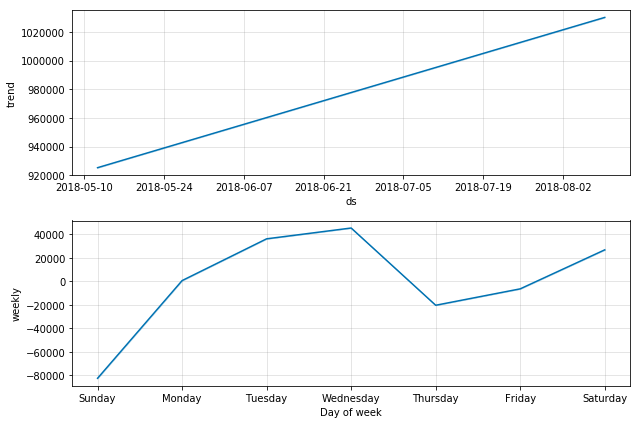

In [13]:
m1.plot_components(forecast1);